<a href="https://colab.research.google.com/github/haviet12/DATE_3_AI/blob/main/COOKER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np 
import skfuzzy as fzz
from skfuzzy import control as ctl

times =ctl.Antecedent(np.arange(10,180,1), "times")
rices =ctl.Antecedent(np.arange(100,500,1),"rices")
power =ctl.Consequent(np.arange(300,1000,1),"power")


In [6]:
#TIMES
times["very fast"]= fzz.trimf(times.universe,[10,10,25])
times["fast"]= fzz.trimf(times.universe,[10,25,50])
times["aver"]= fzz.trimf(times.universe,[25,50,90])
times["slow"]= fzz.trimf(times.universe,[50,90,120])
times["very slow"]= fzz.trimf(times.universe,[90,180,180])

In [7]:
#RICES
rices["s_less"]= fzz.trimf(rices.universe,[100,100,150])
rices["less"]= fzz.trimf(rices.universe,[100,150,250])
rices["aver"]= fzz.trimf(rices.universe,[150,250,300])
rices["much"]= fzz.trimf(rices.universe,[250,300,400])
rices["s_much"]= fzz.trimf(rices.universe,[300,500,500])


In [8]:
#POW
power['very low']=fzz.trimf(power.universe,[300,300,400])
power['low']=fzz.trimf(power.universe,[300,400,450])
power['aver']=fzz.trimf(power.universe,[400,450,700])
power['high']=fzz.trimf(power.universe,[450,700,850])
power['very high']=fzz.trimf(power.universe,[700,1000,1000])

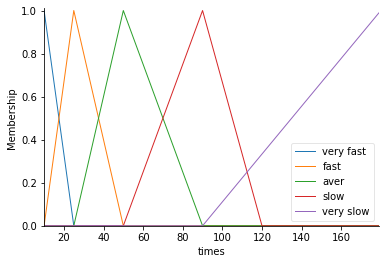

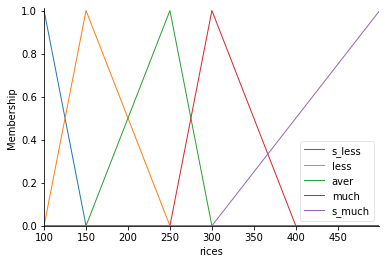

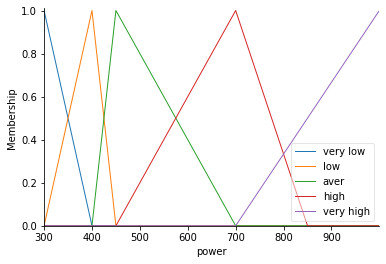

In [9]:
times.view()
rices.view()
power.view()

In [14]:
#RULE
r1= ctl.Rule(times["very fast"]&rices["s_less"], power["very high"])
r2= ctl.Rule(times["very fast"]&rices["less"], power["very high"])
r3= ctl.Rule(times["very fast"]&rices["aver"], power["high"])
r4= ctl.Rule(times["very fast"]&rices["much"], power["aver"])
r5= ctl.Rule(times["very fast"]&rices["s_much"], power["aver"])
r6= ctl.Rule(times["fast"]&rices["s_less"], power["very high"])
r7= ctl.Rule(times["fast"]&rices["less"], power["high"])
r8= ctl.Rule(times["fast"]&rices["s_less"], power["very high"])
r9= ctl.Rule(times["fast"]&rices["aver"], power["aver"])
r10= ctl.Rule(times["fast"]&rices["much"], power["aver"])
r11= ctl.Rule(times["aver"]&rices["s_less"], power[ "high"])
r12= ctl.Rule(times["aver"]&rices["less"], power["high"])
r13= ctl.Rule(times["aver"]&rices["aver"], power["aver"])
r14= ctl.Rule(times["aver"]&rices["much"], power["low"])
r15= ctl.Rule(times["aver"]&rices["s_much"], power["low"])
r16= ctl.Rule(times["slow"]&rices["s_less"], power["aver"])
r17= ctl.Rule(times["slow"]&rices["less"], power["aver"])
r18= ctl.Rule(times["slow"]&rices["aver"], power["low"])
r19= ctl.Rule(times["slow"]&rices["much"], power["very low"])
r20= ctl.Rule(times["slow"]&rices["s_much"], power["very low"])
r21= ctl.Rule(times["very slow"]&rices["s_less"], power["low"])
r22= ctl.Rule(times["very slow"]&rices["less"], power["low"])
r23= ctl.Rule(times["very slow"]&rices["aver"], power["very low"])
r24= ctl.Rule(times["very slow"]&rices["much"], power["very low"])
r25= ctl.Rule(times["very slow"]&rices["s_much"], power["very low"])

482.2939182090126


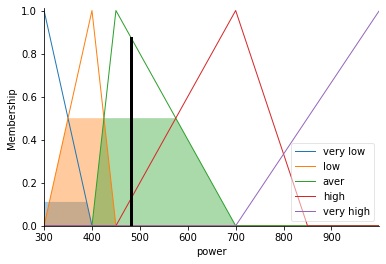

In [15]:
power_ctl= ctl.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,r17,r18,r19,r20,r21,r22,r23,r24,r25])
simulation= ctl.ControlSystemSimulation(power_ctl)
simulation.input["times"]=100
simulation.input["rices"]=200
simulation.compute()
print(simulation.output["power"])
power.view(sim=simulation)